In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = open('points.txt', 'r')
read_data = f.read()
f.close()

In [21]:
point_data = read_data.split('\n')
N = len(point_data)
points = np.zeros((N, 2))
for i in range(N):
    (p1, p2) = point_data[i].split(' ')
    points[i][0] = float(p1)
    points[i][1] = float(p2)
points = np.asmatrix(points)

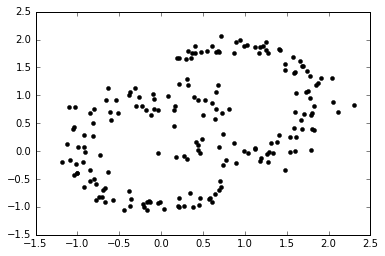

In [22]:
plt.plot(points[:, 0], points[:, 1], '.', ms=8, mfc='black', mec='black')
plt.show()

In [50]:
K = 5


distances = np.zeros((N, N))
for i in range(N):
    for j in range(i, N):
        p = points[i, :] - points[j, :]
        d = np.sqrt(p[0, 0] * p[0, 0] + p[0, 1] * p[0, 1])
        distances[i, j] = d
        distances[j, i] = d
        
neighbours = np.zeros((N, N))        
for i in range(N):
    for j in np.argsort(distances[i, :])[1:1+K]:
        neighbours[i, j] = 1
        neighbours[j, i] = 1 # We make it symmetric
        

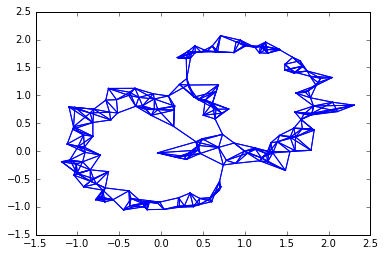

In [54]:
for i in range(N):
    for j in range(N):
        if neighbours[i, j] == 1:
            plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], '-b')